# 加载数据集

In [6]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
word_index=imdb.get_word_index()
reverse_word_index = dict(
                            [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
                            [reverse_word_index.get(i -3, '?') for i in train_data[0]])



In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu',))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [10]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [11]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy]
             )

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size =512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5272 - acc: 0.7824 - val_loss: 0.3944 - val_acc: 0.8724
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3171 - acc: 0.9026 - val_loss: 0.3141 - val_acc: 0.8816
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2318 - acc: 0.9246 - val_loss: 0.3269 - val_acc: 0.8658
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1837 - acc: 0.9393 - val_loss: 0.2822 - val_acc: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1497 - acc: 0.9523 - val_loss: 0.2785 - val_acc: 0.8892
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1228 - acc: 0.9613 - val_loss: 0.2884 - val_acc: 0.8883
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1037 - acc: 0.9691 - val_loss: 0.3038 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0859 - a

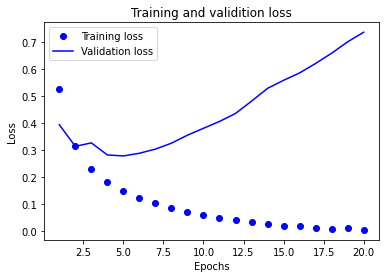

In [15]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validition loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

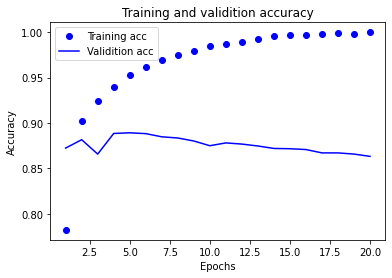

In [16]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validition acc')
plt.title('Training and validition accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10, batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/10
49/49 [==============================] - 1s 11ms/step - loss: 0.4467 - accuracy: 0.8000
Epoch 2/10
49/49 [==============================] - 1s 11ms/step - loss: 0.2405 - accuracy: 0.9113
Epoch 3/10
49/49 [==============================] - 1s 11ms/step - loss: 0.1870 - accuracy: 0.9303
Epoch 4/10
49/49 [==============================] - 1s 11ms/step - loss: 0.1611 - accuracy: 0.9395
Epoch 5/10
49/49 [==============================] - 1s 11ms/step - loss: 0.1309 - accuracy: 0.9517
Epoch 6/10
49/49 [==============================] - 1s 11ms/step - loss: 0.1106 - accuracy: 0.9606
Epoch 7/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0853 - accuracy: 0.9694
Epoch 8/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0711 - accuracy: 0.9753
Epoch 9/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0549 - accuracy: 0.9833
Epoch 10/10
782/782 [==============================] - 1s 1ms/step - loss: 0.6195 - accuracy: 0.8528


In [32]:
print(results)

[0.6194922924041748, 0.8527600169181824]


In [30]:
model.predict(x_test)

array([[0.10516506],
       [0.9998085 ],
       [0.95965624],
       ...,
       [0.09337085],
       [0.07568404],
       [0.9524298 ]], dtype=float32)